
#Understanding the Objective


**The goal is to predict a fellow will be placed or not at the Pathrise Company and how long it takes the fellow to get a job at the company.**


###Import dataset

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx




##Import Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Read the data**

In [ ]:
# Load the data
df = pd.read_excel('Data_Pathrise.xlsx')
# Delete leading and trailing spaces from column names
df.columns = df.columns.str.strip()

##Data Understanding

In [ ]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


###Assess data:

In this section, we will check the data and get an understanding of what kind of data we are dealing with.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

##Show missing values of the data by using heatmap() and isnull().sum() methods

<Axes: >

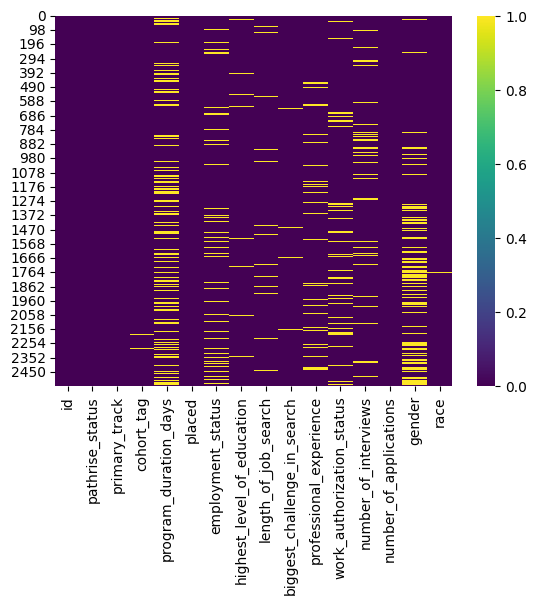

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis')

In [ ]:
df.isnull().sum().sum()

2243

##Showing percentage of missing values in each column of the data

program_duration_days          24.213836
gender                         19.339623
work_authorization_status      11.163522
employment_status               9.001572
professional_experience         8.726415
number_of_interviews            8.569182
length_of_job_search            2.908805
highest_level_of_education      2.279874
biggest_challenge_in_search     0.943396
race                            0.707547
cohort_tag                      0.314465
dtype: float64


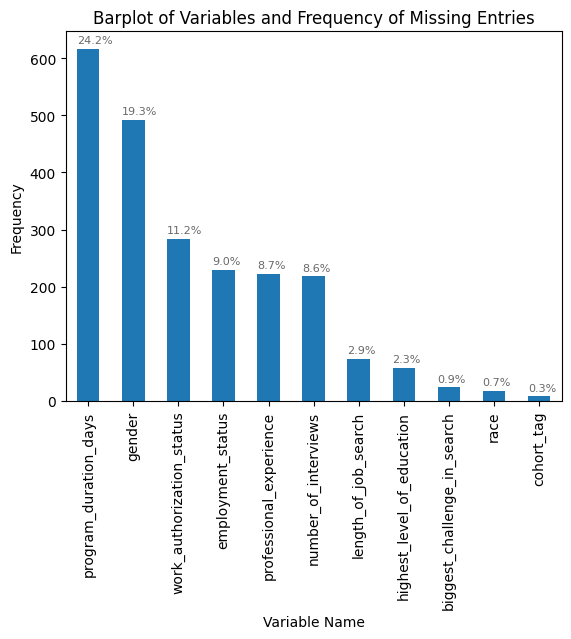

In [ ]:
missing=df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
a=missing.plot(kind='bar')
# a.set_alpha(1)
a.set_title('Barplot of Variables and Frequency of Missing Entries')
a.set_xlabel('Variable Name')
a.set_ylabel('Frequency')



missing_percentage=(missing/len(df)*100)

print(missing_percentage)

for i in a.patches:

     a.text(i.get_x(), i.get_height() + 10, \
            str(round((i.get_height()/len(df))*100, 1))+'%', fontsize=8,
                color='dimgrey')

###correlation_matrix

Using correlation_matrix to see which variable is more correlated to which variable, and we can visualize our results.



In [ ]:
correlation_matrix=df.corr()

ValueError: could not convert string to float: 'Active'

In [ ]:
print(correlation_matrix)

NameError: name 'correlation_matrix' is not defined

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('weight_chart_dpi.png', bbox_inches='tight', dpi=300)
plt.title('Correlation Matrix')
plt.show()

NameError: name 'correlation_matrix' is not defined

In [ ]:
sns.displot(x='placed', data=df,bins=10)

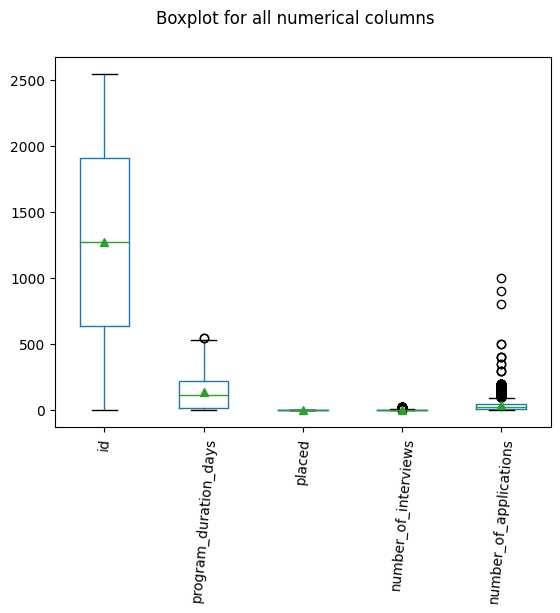

In [ ]:
plt.figure()
plt.suptitle("Boxplot for all numerical columns")
ax = plt.gca()

df.boxplot(showmeans=True, grid=False)
# Rotate x axis text values
for tick in ax.get_xticklabels():
    tick.set_rotation(85)

In [ ]:
sns.boxplot(x = 'placed', y = 'program_duration_days', data = df)



#Clean Data


- by using Correlation Matrix we found that there is no coonection between our target column, 'placed' with columns like 'number_of_applications' and 'number_of_interviews', and these columns are not applicable in this analysis, so drop them.
- 'pathrise_status' column is became droped as this similar to our target column, 'placed' to prevent the result to become overfit.
- cohort_tag' column is used to show the group of people who participated in a course at a certain time, and is not related to our goal, which is a fellow in Pthrise Company will be placed or not?



In [ ]:
df.drop(columns=['id','cohort_tag', 'pathrise_status', 'number_of_applications', 'number_of_interviews'],axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

primary_track                    0
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
gender                         492
race                            18
dtype: int64

##Exploratory Data Analysis (EDA)

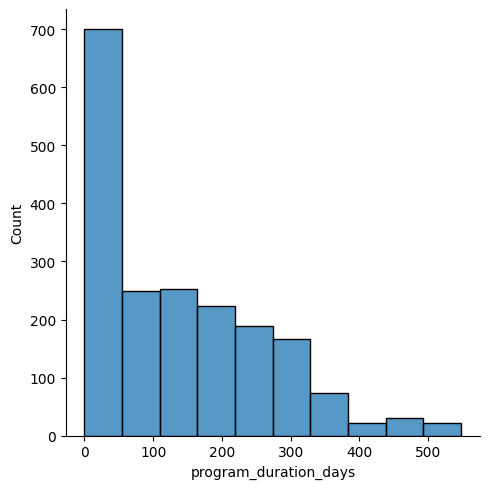

In [ ]:
sns.displot(x='program_duration_days', data=df,bins=10)

In [ ]:
# dropping missing values using mode
df.dropna(subset=['program_duration_days'], inplace=True)

In [ ]:
# drawing changes after filling missing values
sns.displot(x='program_duration_days', data=df,bins=10)

In [ ]:
df.isnull().sum()

primary_track                    0
program_duration_days            0
placed                           0
employment_status              182
highest_level_of_education      42
length_of_job_search            66
biggest_challenge_in_search     20
professional_experience        161
work_authorization_status      221
gender                         371
race                            13
dtype: int64

In [ ]:
# drawing changes after filling missing values
sns.displot(x='program_duration_days', data=df,bins=10)

In [ ]:
df['program_duration_days']= df['program_duration_days'].apply(int)

In [ ]:
df.info()

In [ ]:
sns.countplot(x='primary_track', data=df,  hue='placed')
plt.xticks(rotation=45)




In [ ]:
df.isnull().sum()

primary_track                    0
program_duration_days            0
placed                           0
employment_status              182
highest_level_of_education      42
length_of_job_search            66
biggest_challenge_in_search     20
professional_experience        161
work_authorization_status      221
gender                         371
race                            13
dtype: int64

In [ ]:
df['employment_status']

In [ ]:
# Impute missing values using mode
df['employment_status'].fillna(df['employment_status'].mode()[0], inplace=True)

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='employment_status', data=df, hue='placed')
plt.xticks(rotation=45)

In [ ]:
set(df['employment_status'])

In [ ]:
data=df['employment_status'].value_counts()
data

In [ ]:
data.index

In [ ]:
explode=(0, 0, 0, 0, 0)
color=['red', 'blue', 'yellow', 'green', 'pink']
plt.figure(figsize=(10,10))
plt.pie(data.values, labels=data.index, colors=color, autopct='%1.2f%%',explode = explode, startangle=90)


In [ ]:
sns.countplot(x='highest_level_of_education', data=df,  hue='placed')
plt.xticks(rotation=80)

In [ ]:
# Impute missing values using mode
df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0], inplace=True)

In [ ]:
sns.countplot(x='highest_level_of_education', data=df,  hue='primary_track')
plt.xticks(rotation=80)

In [ ]:
df.isnull().sum()

primary_track                    0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search            66
biggest_challenge_in_search     20
professional_experience        161
work_authorization_status      221
gender                         371
race                            13
dtype: int64

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='highest_level_of_education', data=df,  hue='placed')
plt.xticks(rotation=80)

In [ ]:
sns.countplot(x='length_of_job_search', data=df, hue='placed')
plt.xticks(rotation=80)

In [ ]:
# Impute missing values using mode
df['length_of_job_search'].fillna(df['length_of_job_search'].mode()[0], inplace=True)

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='length_of_job_search', data=df, hue='highest_level_of_education')
plt.xticks(rotation=80)
plt.title('Comparison between length_of_job_search and highest_level_of_education')


In [ ]:
sns.countplot(x='biggest_challenge_in_search', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
# Impute missing values using mode
df['biggest_challenge_in_search'].fillna(df['biggest_challenge_in_search'].mode()[0], inplace=True)

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='biggest_challenge_in_search', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
sns.countplot(x='professional_experience', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
# Impute missing values using mode
df['professional_experience'].fillna(df['professional_experience'].mode()[0], inplace=True)

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='professional_experience', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
sns.countplot(x='work_authorization_status', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
# Impute missing values using mode
df['work_authorization_status'].fillna(df['work_authorization_status'].mode()[0], inplace=True)

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='work_authorization_status', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
sns.countplot(x='gender', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
# Impute missing values using mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='gender', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
sns.countplot(x='race', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
# Impute missing values using mode
df['race'].fillna(df['race'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

primary_track                  0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
gender                         0
race                           0
dtype: int64

In [ ]:
# drawing changes after filling missing values
sns.countplot(x='race', data=df,  hue='placed')
plt.xticks(rotation=90)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 2 to 2543
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   primary_track                1928 non-null   object
 1   program_duration_days        1928 non-null   int64 
 2   placed                       1928 non-null   int64 
 3   employment_status            1928 non-null   object
 4   highest_level_of_education   1928 non-null   object
 5   length_of_job_search         1928 non-null   object
 6   biggest_challenge_in_search  1928 non-null   object
 7   professional_experience      1928 non-null   object
 8   work_authorization_status    1928 non-null   object
 9   gender                       1928 non-null   object
 10  race                         1928 non-null   object
dtypes: int64(2), object(9)
memory usage: 180.8+ KB


In [ ]:
sns.heatmap(df.isnull(), cmap='viridis')

In [ ]:
sns.displot(x='placed', data=df,bins=10)

In [ ]:
sns.boxplot(x = 'placed', y = 'program_duration_days', data = df)

**Feature Engineering**

In [ ]:
preprocessed_df=pd.get_dummies(df, columns=['work_authorization_status', 'highest_level_of_education','gender', 'race', 'primary_track', 'length_of_job_search', 'biggest_challenge_in_search','professional_experience', 'employment_status'])

In [ ]:
x=preprocessed_df.drop(columns=['placed', 'program_duration_days'])

In [ ]:
x= preprocessed_df.drop(columns=['program_duration_days', 'placed'])

In [ ]:
y= preprocessed_df[['program_duration_days', 'placed']]

**Modeling**

##Method Jadi

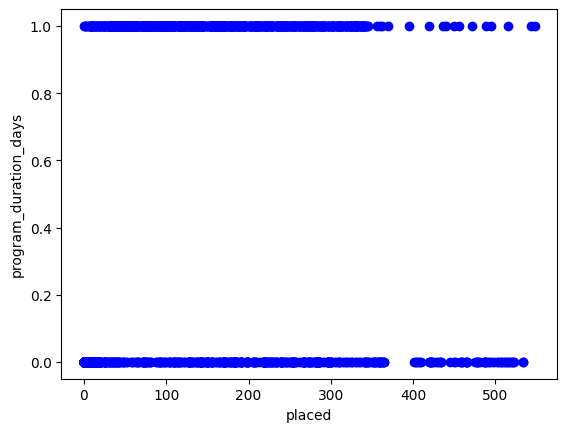

In [ ]:
plt.scatter(preprocessed_df['program_duration_days'],  preprocessed_df['placed'], color='blue')
plt.xlabel("placed")
plt.ylabel("program_duration_days")
plt.show()

In [ ]:
msk = np.random.rand(len(preprocessed_df)) < 0.8
train = preprocessed_df[msk]
test = preprocessed_df[~msk]
print(msk)
print(~msk)
print(preprocessed_df)
print(train)
print(test)

[ True False  True ... False  True  True]
[False  True False ...  True False False]
      program_duration_days  placed  work_authorization_status_Canada Citizen  \
2                         0       0                                     False   
3                         0       0                                     False   
4                        89       1                                     False   
5                         0       0                                     False   
6                         0       0                                     False   
...                     ...     ...                                       ...   
2535                      0       0                                     False   
2538                    118       0                                     False   
2539                    457       0                                     False   
2540                    488       0                                     False   
2543                    2

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['program_duration_days']])
train_y = np.asanyarray(train[['placed']])
regr.fit (train_x, train_y)
print(regr)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

LinearRegression()
Coefficients:  [[0.00077868]]
Intercept:  [0.38538608]


Text(0, 0.5, 'placed')

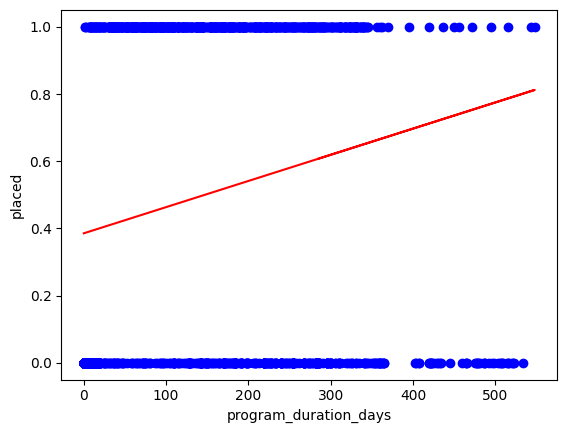

In [ ]:
plt.scatter(train['program_duration_days'], train['placed'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("program_duration_days")
plt.ylabel("placed")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['placed']])
test_y = np.asanyarray(test[['program_duration_days']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 138.74
Residual sum of squares (MSE): 35548.93
R2-score: -1.18


##Method Mona Hatami

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=101)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# print the intercept(b0)
print(lr.intercept_)

[4.03834557e+15 3.72535934e+13]


In [ ]:
# print the coefficients(b1, b2, ...)
print(lr.coef_)

[[-2.52507858e+14 -2.52507858e+14 -2.52507858e+14 -2.52507858e+14
  -2.52507858e+14 -2.52507858e+14 -2.52507858e+14 -2.52507858e+14
  -2.52507858e+14  7.45725141e+14  7.45725141e+14  7.45725141e+14
   7.45725141e+14  7.45725141e+14  7.45725141e+14  7.45725141e+14
   9.46671947e+15  9.46671947e+15  9.46671947e+15  9.46671947e+15
   2.14249900e+15  2.14249900e+15  2.14249900e+15  2.14249900e+15
   2.14249900e+15  2.14249900e+15  2.14249900e+15  2.14249900e+15
   2.14249900e+15 -4.64602329e+15 -4.64602329e+15 -4.64602329e+15
  -4.64602329e+15 -4.64602329e+15 -4.64602329e+15 -3.82801070e+15
  -3.82801070e+15 -3.82801070e+15 -3.82801070e+15 -3.82801070e+15
  -8.61027879e+15 -8.61027879e+15 -8.61027879e+15 -8.61027879e+15
  -8.61027879e+15 -8.61027879e+15 -8.61027879e+15 -8.61027879e+15
  -8.61027879e+15 -8.61027879e+15  2.38031658e+15  2.38031658e+15
   2.38031658e+15  2.38031658e+15 -1.43678513e+15 -1.43678513e+15
  -1.43678513e+15 -1.43678513e+15 -1.43678513e+15]
 [ 7.26579461e+12  7.2657

In [ ]:
# Prediction
prediction= lr.predict(x_test)
prediction

array([[ 1.395000e+02,  5.781250e-01],
       [ 1.325000e+02,  7.187500e-01],
       [ 1.105000e+02,  5.000000e-01],
       [ 1.415000e+02,  5.859375e-01],
       [ 1.795000e+02,  6.250000e-01],
       [ 1.700000e+02,  2.578125e-01],
       [ 1.500000e+02,  6.015625e-01],
       [ 1.525000e+02,  4.062500e-01],
       [ 1.375000e+02,  5.937500e-01],
       [ 8.150000e+01,  5.312500e-01],
       [ 1.540000e+02,  5.468750e-01],
       [ 1.265000e+02,  4.843750e-01],
       [ 9.750000e+01,  4.687500e-01],
       [ 1.455000e+02,  5.859375e-01],
       [ 1.565000e+02,  5.859375e-01],
       [ 1.195000e+02,  6.171875e-01],
       [ 1.475000e+02,  5.156250e-01],
       [ 1.605000e+02,  1.562500e-02],
       [ 1.415000e+02,  6.250000e-01],
       [ 1.205000e+02,  4.531250e-01],
       [ 1.215000e+02,  6.171875e-01],
       [ 6.450000e+01,  3.046875e-01],
       [ 1.475000e+02,  7.578125e-01],
       [ 1.705000e+02,  6.328125e-01],
       [ 1.660000e+02,  5.937500e-01],
       [ 8.200000e+01,  4

In [ ]:
residual = y_test - prediction


In [ ]:
residual

,program_duration_days,placed
2339,-48.5,-0.578125
76,10.5,0.281250
1087,-98.5,-0.500000
1975,-141.5,-0.585938
82,53.5,-0.625000
...,...,...
1170,10.5,0.492188
243,108.5,-0.562500
203,-32.0,0.453125
9,-148.0,-0.289062


In [ ]:
sns.displot(residual, bins=50)


In [ ]:
sns.histplot(x='program_duration_days', data=df,bins=10, kde=True )

In [ ]:
sns.displot(x='program_duration_days', data=df,bins=10)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))

MAE:  56.81394713406736


**classification**

In [ ]:
x = preprocessed_df.drop(columns=['placed'])

In [ ]:
y=preprocessed_df['placed']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=101)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = logreg.predict(x_test)

In [ ]:
prediction

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
y_test

2339    0
76      1
1087    0
1975    0
82      0
       ..
1170    1
243     0
203     1
9       0
1106    0
Name: placed, Length: 386, dtype: int64

In [ ]:
len(y_test)

In [ ]:
confusion_matrix(y_test,prediction)

array([[125,  93],
       [ 53, 115]])

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       218
           1       0.55      0.68      0.61       168

    accuracy                           0.62       386
   macro avg       0.63      0.63      0.62       386
weighted avg       0.64      0.62      0.62       386



In [ ]:
accuracy_score(y_test, prediction)

0.6217616580310881

###Jadi(ML0101EN-Clas-Logistic-Reg-churn)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, prediction, labels=[1,0]))

[[115  53]
 [ 93 125]]


Confusion matrix, without normalization
[[115  53]
 [ 93 125]]


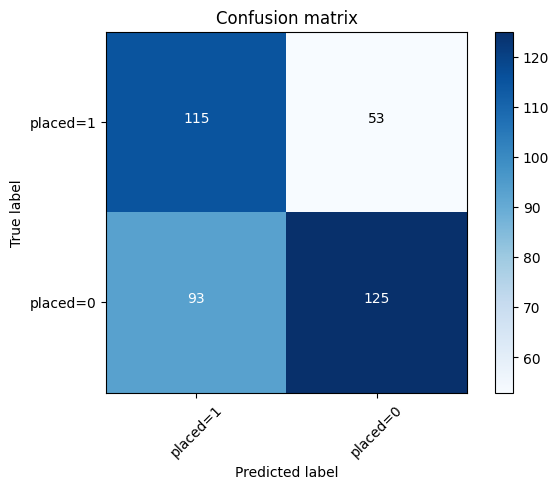

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)
# percision=2 yani ta 2 ragham


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['placed=1','placed=0'],normalize= False,  title='Confusion matrix')

###True predict shodehamoon:
TP=115

TN=125

###False predict shodehamoon:
FP=93

FN=53









**K Nearest Neighbor**

In [ ]:
knn= KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

In [ ]:
prediction_knn = knn.predict(x_test)
prediction_knn

In [ ]:
confusion_matrix(y_test, prediction_knn)

In [ ]:
accuracy_score(y_test, prediction_knn)

In [ ]:
print(classification_report(y_test, prediction_knn))

**DECISION TREE**

In [ ]:
tree= DecisionTreeClassifier()

In [ ]:
tree.fit(x_train, y_train)

In [ ]:
prediction_tree = tree.predict(x_test)

In [ ]:
confusion_matrix(y_test, prediction_tree)

In [ ]:
accuracy_score(y_test, prediction_tree)

In [ ]:
print(classification_report(y_test, prediction_tree))

**Random Forest**

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
prediction_rf = rf.predict(x_test)

In [ ]:
confusion_matrix(y_test, prediction_rf)

array([[142,  76],
       [ 20, 148]])

In [ ]:
accuracy_score(y_test, prediction_rf)

0.7512953367875648

In [ ]:
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75       218
           1       0.66      0.88      0.76       168

    accuracy                           0.75       386
   macro avg       0.77      0.77      0.75       386
weighted avg       0.78      0.75      0.75       386



##Jadi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, prediction, labels=[1,0]))

[[115  53]
 [ 93 125]]


Confusion matrix, without normalization
[[115  53]
 [ 93 125]]


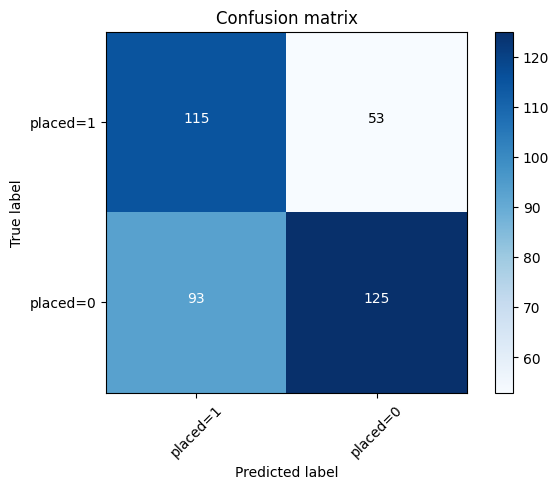

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)
# percision=2 yani ta 2 ragham


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['placed=1','placed=0'],normalize= False,  title='Confusion matrix')

**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear')

In [ ]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions_svc = svm.predict(x_test)

In [ ]:
confusion_matrix(y_test, predictions_svc)

array([[124,  94],
       [ 51, 117]])

In [ ]:
accuracy_score(y_test, predictions_svc)

0.6243523316062176

In [ ]:
print("Accuracy:", accuracy_score(y_test, predictions_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_svc))
print("Classification Report:\n", classification_report(y_test, predictions_svc))

Accuracy: 0.6243523316062176
Confusion Matrix:
 [[124  94]
 [ 51 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63       218
           1       0.55      0.70      0.62       168

    accuracy                           0.62       386
   macro avg       0.63      0.63      0.62       386
weighted avg       0.64      0.62      0.63       386



In [ ]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       218
           1       0.55      0.70      0.62       168

    accuracy                           0.62       386
   macro avg       0.63      0.63      0.62       386
weighted avg       0.64      0.62      0.63       386



##Jadi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, prediction, labels=[1,0]))

[[115  53]
 [ 93 125]]


Confusion matrix, without normalization
[[115  53]
 [ 93 125]]


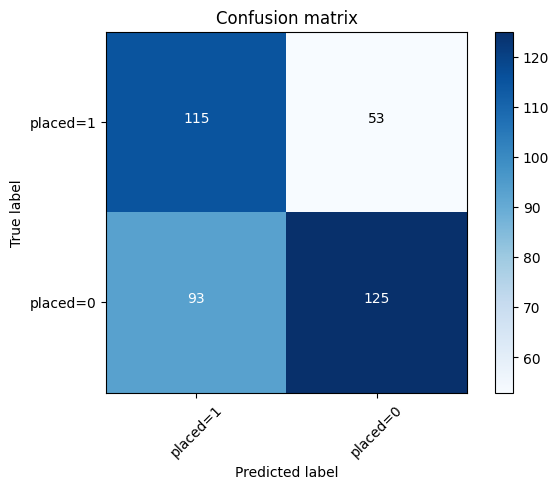

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)
# percision=2 yani ta 2 ragham


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['placed=1','placed=0'],normalize= False,  title='Confusion matrix')

**Visualization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tabulate import tabulate

In [ ]:
# Assuming 'x' is your feature matrix and 'y' is your target variable, replace them with your actual data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
# Initialize classifiers
logistic_regression = LogisticRegression()
svm_classifier = SVC(kernel='linear')
decision_tree = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
random_forest = RandomForestClassifier()

In [ ]:
# Fit the models
logistic_regression.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)
random_forest.fit(x_train, y_train)

In [ ]:
# Make predictions
lr_predictions = logistic_regression.predict(x_test)
svm_predictions = svm_classifier.predict(x_test)
dt_predictions = decision_tree.predict(x_test)
knn_predictions = knn_classifier.predict(x_test)
rf_predictions = random_forest.predict(x_test)


In [ ]:
# Calculate evaluation metrics
precision_scores = [
    precision_score(y_test, lr_predictions),
    precision_score(y_test, svm_predictions),
    precision_score(y_test, dt_predictions),
    precision_score(y_test, knn_predictions),
    precision_score(y_test,rf_predictions)
]

In [ ]:
recall_scores = [
    recall_score(y_test, lr_predictions),
    recall_score(y_test, svm_predictions),
    recall_score(y_test, dt_predictions),
    recall_score(y_test, knn_predictions),
    recall_score(y_test, rf_predictions)
]

In [ ]:
f1_scores = [
    f1_score(y_test, lr_predictions),
    f1_score(y_test, svm_predictions),
    f1_score(y_test, dt_predictions),
    f1_score(y_test, knn_predictions),
    f1_score(y_test, rf_predictions)
]

In [ ]:
accuracy_scores = [
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, svm_predictions),
    accuracy_score(y_test, dt_predictions),
    accuracy_score(y_test, knn_predictions),
    accuracy_score(y_test, rf_predictions)
]

In [ ]:
# Prepare data for tabulate
data = [
    ["Metric", "Logistic Regression", "Support Vector Machine", "Decision Tree Classifier","KNN Classifier","Random Forest"],
    ["Precision", *precision_scores],
    ["Recall", *recall_scores],
    ["F1-Score", *f1_scores],
    ["Accuracy", *accuracy_scores]
]

In [ ]:
# Print the table
print(tabulate(data, tablefmt="fancy_grid", numalign="center", stralign="center"))

In [ ]:
data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbor','Random Forest'],
    'Accuracy': [0.62, 0.62  ,0.68 , 0.75, 0.74 ]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
plt.figure(figsize=(10, 6))

In [ ]:
plt.figure(figsize=(10, 6))

# Adjust the width of the bars
bar_width = 0.4  # You can adjust this value to make the bars even narrower

bars = plt.bar(df['Model'], df['Accuracy'], color='blue', width=bar_width)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')

# Add exact numbers on top of each bar
for bar, acc in zip(bars, df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', va='bottom', color='black')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['SVM', 'DT', 'RF', 'KNN', 'LR']
accuracy = [0.62, 0.62  ,0.68 , 0.75, 0.74]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['b', 'g', 'r', 'c', 'm'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Machine Learning Models')
plt.ylim(0.5, 1.05)  # Set the y-axis limits to avoid overlapping bars at the top


